<a href="https://colab.research.google.com/github/nicocarrion1/DiploDatos_AyV_G5/blob/main/Entregable_2_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

<font color='orange'> 

**Grupo 5**: Nicolás Carrión, Génesis Núñez Sanchez, Magdalena Sella, Exequiel Santucho
</font>

En el desarrollo que continúa, se indican en color <font color='skyblue'>celeste</font> los comentarios y planteos añadidos.

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                ...                     
                             count          mean  ...       75%        max
profile_gender                                    ...                     
Hombre                      4944.0  98836.063558  ...  110000.0  2080000.0
Mujer                        908.0  73501.414465  ...   92000.0   800000.0
Otros                         31.0  95441.354839  ...  117500.0   380000.0

[3 rows x 8 columns]

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                 ...                     
                             count           mean  ...       75%        max
profile_gender                                     ...                     
Hombre                      4815.0  101481.624343  ...  110000.0  2080000.0
Mujer                        863.0   77328.913778  ...   93000.0   800000.0
Otros                         28.0  105660.714286  ...  122750.0   380000.0

[3 rows x 8 columns]

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO


# Filtado valores extremos
max_limit = 2.5*float(df['salary_monthly_NETO'].quantile([0.95])) # Descarto valores extremos en Salario Neto y/o Bruto
min_limit = 2.5*float(df['salary_monthly_NETO'].quantile([0.02]))
dff = df.loc[(df['salary_monthly_NETO'] < max_limit) & (df['salary_monthly_NETO'] > min_limit)]

is_man = dff.profile_gender == 'Hombre'
groupA = dff[is_man].salary_monthly_NETO
groupB = dff[~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

<font color='skyblue'> 
a) Estimación puntual

El cálculo del estimador puntual para la resta de medias entre *salario neto* para *hombres* y *otros géneros* (denotado como $\bar{X}^C$) se expresa como:
$$ \bar{X}^C = \bar{X}^A - \bar{X}^B$$
donde $ \bar{X}^A$ y $\bar{X}^B$ son directamente las medias muestrales para los salarios de *hombres* y *no hombres* (es decir, otros géneros), respectivamente.
 </font>

In [ ]:
import numpy as np
# a) Estimación puntual

media_C = groupA.mean() - groupB.mean()
print('Estadístico Media Muestral: ', round(media_C,2))

Estadístico Media Muestral:  18495.03


<font color='skyblue'> 
b) Estimación por intervalos
</font>

<font color='skyblue'>
b.1) Manual
</font>

<font color='skyblue'> 
Se escoge como estimador del intervalo de confianza $1-\alpha$ a:
$$ \left[ \bar{X}^C - t_{\alpha/2, n-1} \frac{S^C}{\sqrt{n}} ,   \bar{X}^C + t_{\alpha/2, n-1} \frac{S^C}{\sqrt{n}}  \right] $$
Donde t (de Student) se obtiene de Tabla o [calculadora online](https://www.uv.es/ceaces/scrips/tablas/tastud.htm), 

$$S^C = \sqrt{\frac{\sum_i^{n} ( X_i^C - \bar{X}^C)}{n-1}}  $$ (estimador de $ \sigma $).
</font>

<font color='skyblue'> 
b.2) SciPy

La diferencia entre ambas maneras de calcularlas es despreciable.
Estos intervalos de confianza definen la zona por fuera de la cual se está en zona de rechazo de la hipótesis propuesta.
</font>

In [ ]:
import statistics
import math
# b) Estimación por intervalos
# b.1) Manual
alpha = 0.05
t = 1.645 # https://www.uv.es/ceaces/scrips/tablas/tastud.htm con P=0.1 (p/2 + p/2) y n=4815-1
S_C = statistics.stdev(groupA-groupB_expand) # Estimador de sigma (raiz cuadrada de la varianza)
pivote = t*S_C/math.sqrt(n)

limit_inf = media_C - pivote
limit_sup = media_C + pivote
print('Intervalo de confianza con de nivel (1-{}): [{},{}]' .format(alpha, round(limit_inf,2), round(limit_sup,2)))

# b.2) SciPy
import scipy.stats as st

limites = st.t.interval(1-2*alpha, n-1, loc=media_C, scale=st.sem(groupA-groupB_expand)) # st.sem: standard error of the mean
print(limites)

Intervalo de confianza con de nivel (1-0.05): [16805.29,20184.76]
(16805.117372673645, 20184.941075782204)


<font color='skyblue'> Estos intervalos de confianza definen la zona por fuera de la cual se está en zona de rechazo de la hipótesis propuesta. </font>

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$ H_0: \mu_X = \mu_Y → \mu_X - \mu_Y = 0$

“La distribución de la media de los salarios es igual para los grupos A y B”

**Hipótesis Alternativa**

$ H_1: \mu_X \neq \mu_Y $

“La distribución de la media de los salarios es distinta para los grupos A y B”


**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$

Si se emplea el método de Welch, el estadístico queda:
$$  T_W =\frac{\bar{X} - \bar{Y}}{ \sqrt{\frac{S_ X^2}{n_1} + \frac{S_ Y^2}{n_2}}} \sim t_{k}$$
donde
$$ k = \frac{(S_X^2/n_1 +S_Y^2/n_2)^2} {(S_X^2/n_1)^2/(n_1-1) + (S_Y^2/n_2)^2/(n_2-1) } $$



Bajo $H_0$, el estadístico tiene una distribución t de Student de $k$ grados de libertad.


<font color='skyblue'>

2.1) Formalización
</font>

<font color='skyblue'>
**Hipótesis nula**:  “La distribución de la media de los salarios es igual para los grupos A y B”
$ H_0: \mu_X = \mu_Y \rightarrow \mu_X - \mu_Y = 0 $
</font>

<font color='skyblue'>

**Hipótesis alternativa**: “La distribución de la media de los salarios es distinta para los grupos A y B”
$ H_1: \mu_X \neq \mu_Y $
</font>

<font color='skyblue'>
Como se plantea un test para probar una igualdad de medias, el estadístico a emplear será: 

<font color='skyblue'>
$$ T = \frac{(\bar{X} - \bar{Y}) - (\mu_X - \mu_Y)}{S \sqrt{(n_1+n_2)/(n_1 n_2)}} \sim t_{n_1+n_2-2} $$ con $$ S = \sqrt{ \frac{\sum_i^{n_1} ( X_i - \bar{X})^2 +  \sum_i^{n_2} ( Y_i - \bar{Y})^2 }{n_1 + n_2 - 2} } $$ porque las muestras no tienen el mismo tamaño ni varianzas. Otra forma de escribir el estadístico es empleando una desviación estándar agrupada (pool), en donde:

<font color='skyblue'>
$$ T_P = \frac{(\bar{X} - \bar{Y}) - (\mu_X - \mu_Y)}{S_P \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim t_{n_1+n_2-2} $$
con
$$ S_P^2 = \frac{(n_1-1)S_X^2 + (n_2-1)S_ Y^2}{n_1+n_2-2} $$

<font color='skyblue'>
Si se emplea el método de Welch, el estadístico queda:


<font color='skyblue'>
$$ T_W =\frac{\bar{X} - \bar{Y}}{ \sqrt{\frac{S_ X^2}{n_1} + \frac{S_ Y^2}{n_2}}} \sim t_{k}  $$
donde
$$ k = \frac{(S_X^2/n_1 +S_Y^2/n_2)^2} {(S_X^2/n_1)^2/(n_1-1) + (S_Y^2/n_2)^2/(n_2-1) } $$

<font color='skyblue'>
Bajo $H_0$, el estadístico tiene una distribución t de Student de k grados de libertad. Si $ n_1 + n_2 $ es suficientemente grande, el estadístico se aproxima a una distribución normal centrada en 0:
$ T  \sim N(0, \sigma^2) $, 
pero como no conocemos $ \sigma $, nos quedamos con el método de Welch.

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

<font color='skyblue'>

2.2) P-valor
</font>

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.

<font color='skyblue'>

a) Manual
</font>

<font color='skyblue'>
Se calcula con:
</font>

<font color='skyblue'>
$$ p-valor = Pr(|T_W| > T_W^{c})$$

<font color='skyblue'>
donde el estadístico observado es $ T_W^c \sim t_c $ (calculado con los datos de las muestras) y $ T_W \sim t_{\alpha/2,k}$ (sacado de Tabla o calculadora online. Para calcular la probabilidad anterior es conveniente dividirla en dos

<font color='skyblue'>
$$ p-valor = Pr(T_W > T_W^{c}) + Pr(T_W <-T_W^{c})  $$

<font color='skyblue'>
Por la simetría de la distribución t de Student, ambos términos son iguales, por lo que

<font color='skyblue'>
$$ p-valor = 2 Pr(T_W > T_W^{c}) =2(1- Pr(T_W <-T_W^{c})).  $$

<font color='skyblue'>

b) SciPy
</font>

<font color='skyblue'>
Se emplea el test de Student directamente con “scipy.stats.ttest_ind” (documentación).

<font color='skyblue'>

Conclusión: Como $p - valor \approx 0 < \alpha = 0.05 $, se decide rechazar la hipótesis nula.
</font>

In [ ]:
# a) Manual
media_X = groupA.mean()
media_Y = groupB.mean()
S_X = statistics.stdev(groupA)
S_Y = statistics.stdev(groupB)
n_1 = groupA.shape[0]
n_2 = groupB.shape[0]
k = round(((S_X**2/n_1 + S_Y**2/n_2)**2)/((S_X**2/n_1)**2/(n_1-1) + (S_Y**2/n_2)**2/(n_2-1)),0)

t_c = (media_X - media_Y)/(math.sqrt(S_X**2/n_1 + S_Y**2/n_2))

prob_t_c = st.t.cdf(t_c, k) # uso Scipy: Pr(t < t_c) (Función de Distribución Acumuluada)
p_valor = 2*(1-prob_t_c)

print('Manual')
print('estadistico (t)= ', t_c)
print('p-valor= ', p_valor)

# b) SciPy
import scipy.stats as st
#!pip install scipy --upgrade # Se debe ejecutar una sola vez. Luego de actualizado, reiniciar el entorno con "Restart runtime" y comentar esta línea antes de ejecutar de nuevo.
#estadistico, p_valor = st.ttest_ind(groupA, groupB, equal_var=False) # Versión de scipy inferior a 1.6.0
estadistico, p_valor = st.ttest_ind(groupA, groupB, equal_var=False)

print('SciPy')
print('estadistico (t)= ', estadistico)
print('p-valor= ', p_valor)

Manual
estadistico (t)=  10.116836954065112
p-valor=  0.0
SciPy
estadistico (t)=  10.116836954065107
p-valor=  2.0804763824766308e-23


<font color='skyblue'>

Como $p - valor \approx 0 < \alpha = 0.05$ Se decide rechazar la hipótesis nula.
</font>

2. Interprete el resultado.

<font color='skyblue'>

El p-valor hace las veces de un nivel de significancia crítico, ya que es el mínimo valor de significancia tal que se rechaza la hipótesis nula. El p-valor asociado a un resultado es la probabilidad de obtener un valor como el observado (o más extremo) si la hipótesis nula es cierta. 
Es por ello que al ser un valor tan pequeño, prácticamente nulo, me está indicando que la probabilidad de obtener valores de medias iguales entre salarios de hombres y no hombres es prácticamente nula.
</font>


3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

<font color='skyblue'>

Esto está relacionado con la potencia estadística de la prueba realizada. El tamaño de la muestra determina la cantidad de error de muestreo inherente a un resultado de la prueba. En igualdad de condiciones, los efectos son más difíciles de detectar en muestras más pequeñas. El aumento de tamaño de la muestra es a menudo la manera más fácil de aumentar la potencia estadística de una prueba.
Esta pregunta se puede responder haciendo un análisis de potencia del test (ver siguiente).
</font>


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

<font color='skyblue'>

Se hace con la herramienta “statsmodels.stats.power.tt_ind_solve_power” de Python ([documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)).
</font>


In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

powers = [.8, .9, .95]
tamano = []

for power in powers:
  n = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)
  tamano.append(round(n))

print(tamano)

[310, 415, 513]


<font color='skyblue'>

Los tamaños de las muestras para obtener una potencia de 0.8, 0.9 y 0.95 son de 310, 415, y 513 datos, respectivamente. Por lo que se puede decir que la cantidad de datos es suficiente para el análisis realizado (ya que n_min = 891).
</font>

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


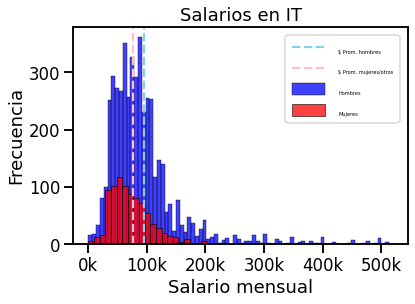

In [ ]:


ax = seaborn.histplot(x=groupA,color="blue", label="Hombres")
ax = seaborn.histplot(x=groupB,color="red", label="Mujeres")

ax.axvline(groupA.mean(), color='skyblue',
            linestyle='--', label='$ Prom. hombres')
ax.axvline(groupB.mean(), color='pink',
            linestyle='--', label='$ Prom. mujeres/otros')
plt.xlabel('Salario mensual')
plt.ylabel('Frecuencia')
plt.title('Salarios en IT')
plt.legend() 
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
xlabels = ['{:,.0f}'.format(x) + 'k' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.legend(title = '', bbox_to_anchor = (1, 1)) # loc = 'upper right')
plt.setp(ax.get_legend().get_texts(), fontsize='5')
plt.setp(ax.get_legend().get_title(), fontsize='5')

plt.show()
